### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Целью проекта является прогнозирование цены на ноутбуки на основе их характеристик с помощью регрессий

### Загрузка данных

In [6]:
df = pd.read_csv('laptopPrice.csv')

In [7]:
df.head(15)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


##### Данные содержат следующие столбцы:

brand - Название бренда ноутбука

processor_brand - Производитель процессора

processor_name - Название модели процессора

processor_gnrtn - Поколение процессора

ram_gb - Объем оперативной памяти (ОЗУ) в гигабайтах (ГБ).

ram_type - Тип оперативной памяти

ssd - Объем SSD-накопителя в гигабайтах (ГБ).

hdd - Объем HDD-накопителя в гигабайтах (ГБ).

os - Установленная операционная система 

os_bit - Разрядность операционной системы 

graphic_card_gb - Объем памяти видеокарты в гигабайтах (ГБ).

weight - Вес ноутбука в килограммах (кг).

warranty - Срок гарантии на ноутбук

Touchscreen - Наличие сенсорного экрана 

msoffice - Наличие предустановленного Microsoft Office 

Price - Цена ноутбука в валюте (например, рубли, доллары).

rating - Средний рейтинг ноутбука (например, 4.5 из 5).

Number of Ratings - Количество оценок, оставленных пользователями.

Number of Reviews - Количество отзывов, оставленных пользователями.


In [9]:
# Смотрим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [10]:
#Смотрим статистику датасета
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [11]:
# Набор данных содержит 823 строки и 19 столбцов.
# Все значения не равны нулю.
# Тип данных большинства столбцов - object.
# Цена, количество оценок и количество отзывов - целочисленный тип данных.

In [13]:
print(df.isnull().sum())

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


<Figure size 800x600 with 0 Axes>

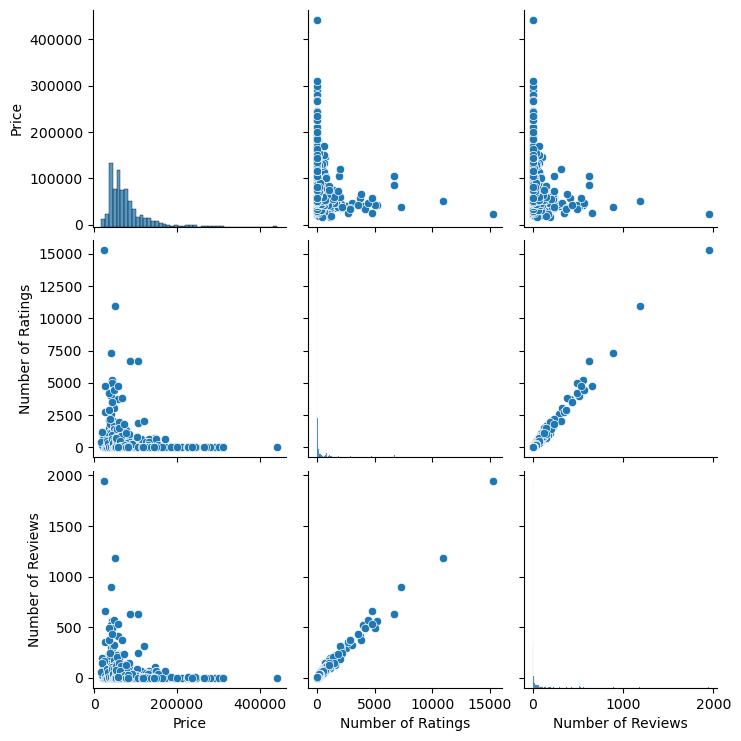

In [19]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

In [23]:
# Видна хорошая зависимость между number of ratings и number of reviews.

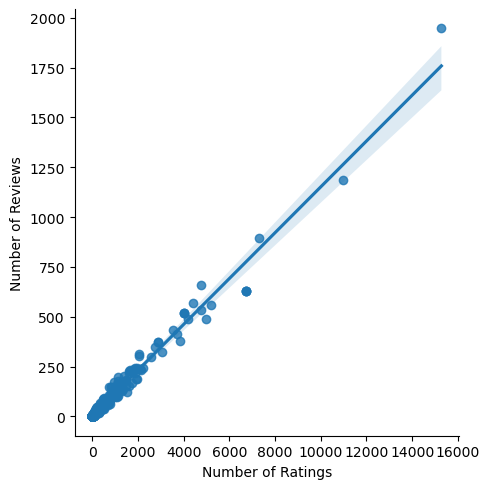

In [24]:
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=df);

In [25]:
columns = ['Price', 'Number of Ratings', 'Number of Reviews']

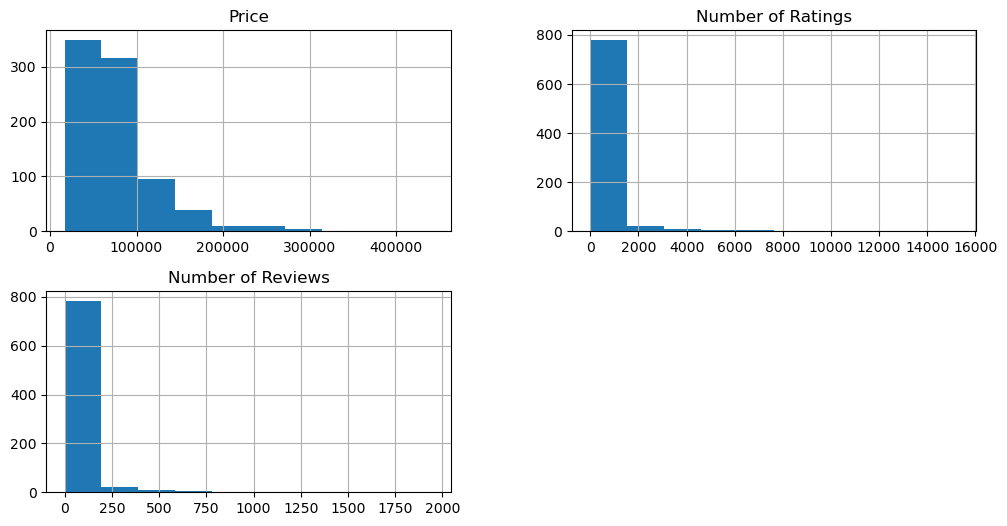

In [26]:
df[columns].hist(figsize=(12, 6));

In [32]:
# Существует сильная корреляция между количеством оценок и количеством отзывов.
# И существует слабая  корреляция между ценой и количеством оценок и обзоров.
# Т.е дорогие ноутбуки получают очень мало отзывов (и оценок) или вообще не получают их.

<Axes: xlabel='Price', ylabel='Density'>

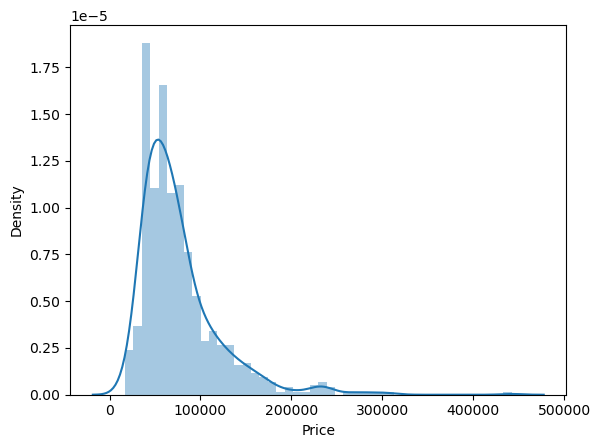

In [34]:
sns.distplot(df['Price'])

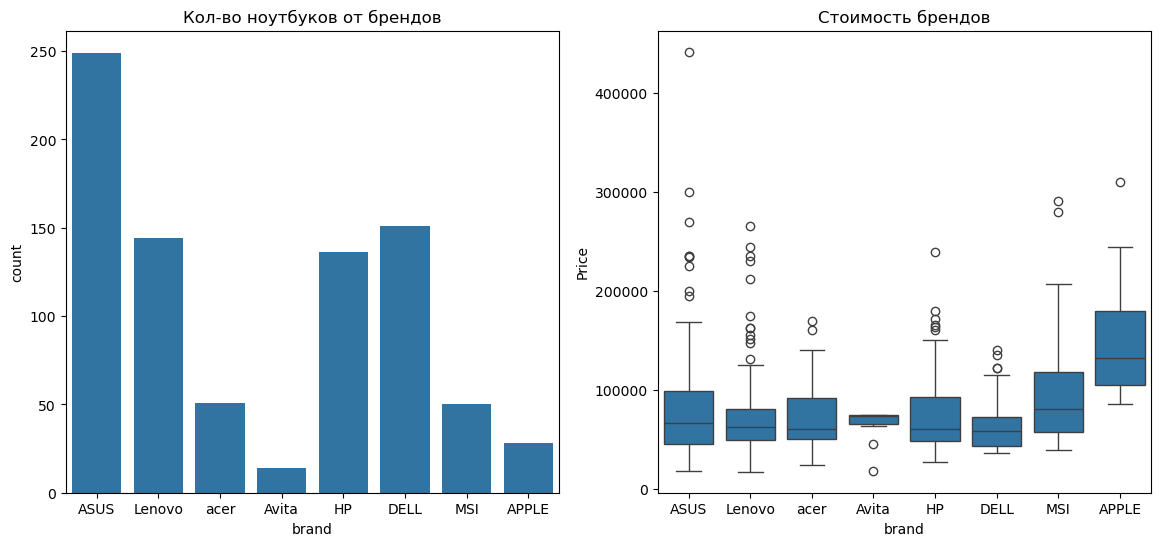

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.brand)
axes[0].set_title("Кол-во ноутбуков от брендов")

sns.boxplot(ax=axes[1], x=df.brand, y=df.Price)
axes[1].set_title("Стоимость брендов");

In [37]:
df['processor_gnrtn']

0               10th
1               10th
2               10th
3               10th
4      Not Available
           ...      
818    Not Available
819    Not Available
820    Not Available
821    Not Available
822             10th
Name: processor_gnrtn, Length: 823, dtype: object

In [40]:
df[df['processor_gnrtn'] == "Not Available"]['processor_brand'].value_counts()

processor_brand
AMD      185
Intel     40
Name: count, dtype: int64

In [42]:
df['processor_brand'].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [44]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [46]:
df["brand"] = df["brand"].map({
    "ASUS":1,
    "DELL":2,
    "Lenovo":3,
    "HP":4,
    "acer":5,
    "MSI":6,
    "APPLE":7,
    "Avita":8
})
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,1,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,1,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,1,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [48]:
df["processor_brand"] = df["processor_brand"].map({
    "Intel":1,
    "AMD":2,
    "M1":3
})
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,1,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,1,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,2,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,1,2,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,1,2,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,1,2,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [50]:
df["ram_gb"] = df["ram_gb"].str.replace(" GB", "").astype(int)

In [52]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,3,1,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,3,1,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,1,1,Core i5,10th,8,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,1,1,Celeron Dual,Not Available,4,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [54]:
df["processor_name"] = df["processor_name"].map({
    "Core i5":1,"Core i3":2  ,"Core i7":3 ,
    "Ryzen 5":4,"Ryzen 7":5,"Ryzen 3":6,
    "Ryzen 9":7,"Celeron Dual":8,"M1":9,
    "Pentium Quad":10,"Core i9":11})


In [56]:
df["ram_type"].value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [58]:
df["ram_type"] = df["ram_type"].map({
    "DDR4": 1,
    "LPDDR4X": 2,
    "LPDDR4": 3,
    "LPDDR3": 4,
    "DDR5": 5,
    "DDR3": 6
})

In [60]:
df["ssd"] = df["ssd"].str.replace(" GB", "").astype(int)

In [62]:
df["hdd"] = df["hdd"].str.replace(" GB", "").astype(int)

In [64]:
df["graphic_card_gb"] = df["graphic_card_gb"].str.replace(" GB", "").astype(int)


In [66]:
df["Touchscreen"] = df["Touchscreen"].map({"No":0,"Yes":1})

In [68]:
df["rating"] = df["rating"].str.replace(" stars", "", regex=False)
df["rating"] = df["rating"].str.replace(" star", "", regex=False)
df["rating"] = df["rating"].str.strip()
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating"] = df["rating"].fillna(0).astype(int)

In [70]:
df[['brand', "processor_name", 'processor_brand',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'graphic_card_gb', 'Touchscreen', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews']].corr()

,brand,processor_name,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
brand,1.000000,0.073083,0.190863,0.145681,-0.042845,-0.011057,-0.090194,0.033632,-0.075946,0.167507,0.089997,0.065733,0.049435
processor_name,0.073083,1.000000,0.628763,-0.005328,0.002660,0.176387,-0.090639,0.078568,-0.040212,0.230249,-0.024348,0.126394,0.127684
processor_brand,0.190863,0.628763,1.000000,-0.063537,-0.095796,0.194273,-0.147134,0.018454,-0.043566,0.178755,0.115554,0.101555,0.082937
ram_gb,0.145681,-0.005328,-0.063537,1.000000,0.058464,0.390703,-0.176682,0.278544,0.056914,0.518323,0.018126,-0.113348,-0.116811
ram_type,-0.042845,0.002660,-0.095796,0.058464,1.000000,0.052013,-0.054191,0.046723,0.060501,0.260674,-0.083229,0.006140,0.007814
ssd,-0.011057,0.176387,0.194273,0.390703,0.052013,1.000000,-0.589509,0.334424,0.171277,0.628272,0.037787,-0.164338,-0.169160
hdd,-0.090194,-0.090639,-0.147134,-0.176682,-0.054191,-0.589509,1.000000,-0.058491,-0.191694,-0.252699,-0.070010,0.103361,0.113588
graphic_card_gb,0.033632,0.078568,0.018454,0.278544,0.046723,0.334424,-0.058491,1.000000,-0.103253,0.459986,0.040920,-0.027118,-0.021457
Touchscreen,-0.075946,-0.040212,-0.043566,0.056914,0.060501,0.171277,-0.191694,-0.103253,1.000000,0.189126,-0.003788,-0.100870,-0.101605
Price,0.167507,0.230249,0.178755,0.518323,0.260674,0.628272,-0.252699,0.459986,0.189126,1.000000,-0.033528,-0.140392,-0.148738


<Axes: >

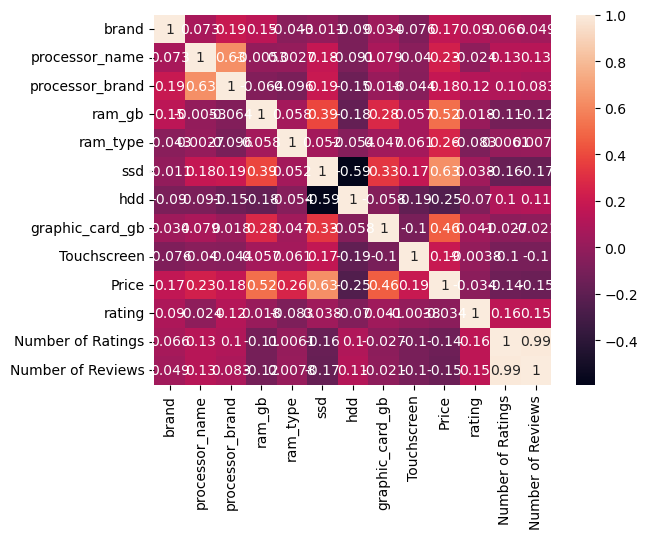

In [72]:
sns.heatmap(df[['brand', "processor_name", 'processor_brand',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'graphic_card_gb', 'Touchscreen', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews']].corr(), annot=True)

##### Видим корреляцию между price и ram_gb (объем оперативной памяти), price и ram_type (тип оперативной памяти), price и graphic_card_gb (объем памяти видеокарты), price и ssd

<Axes: xlabel='ram_gb', ylabel='Price'>

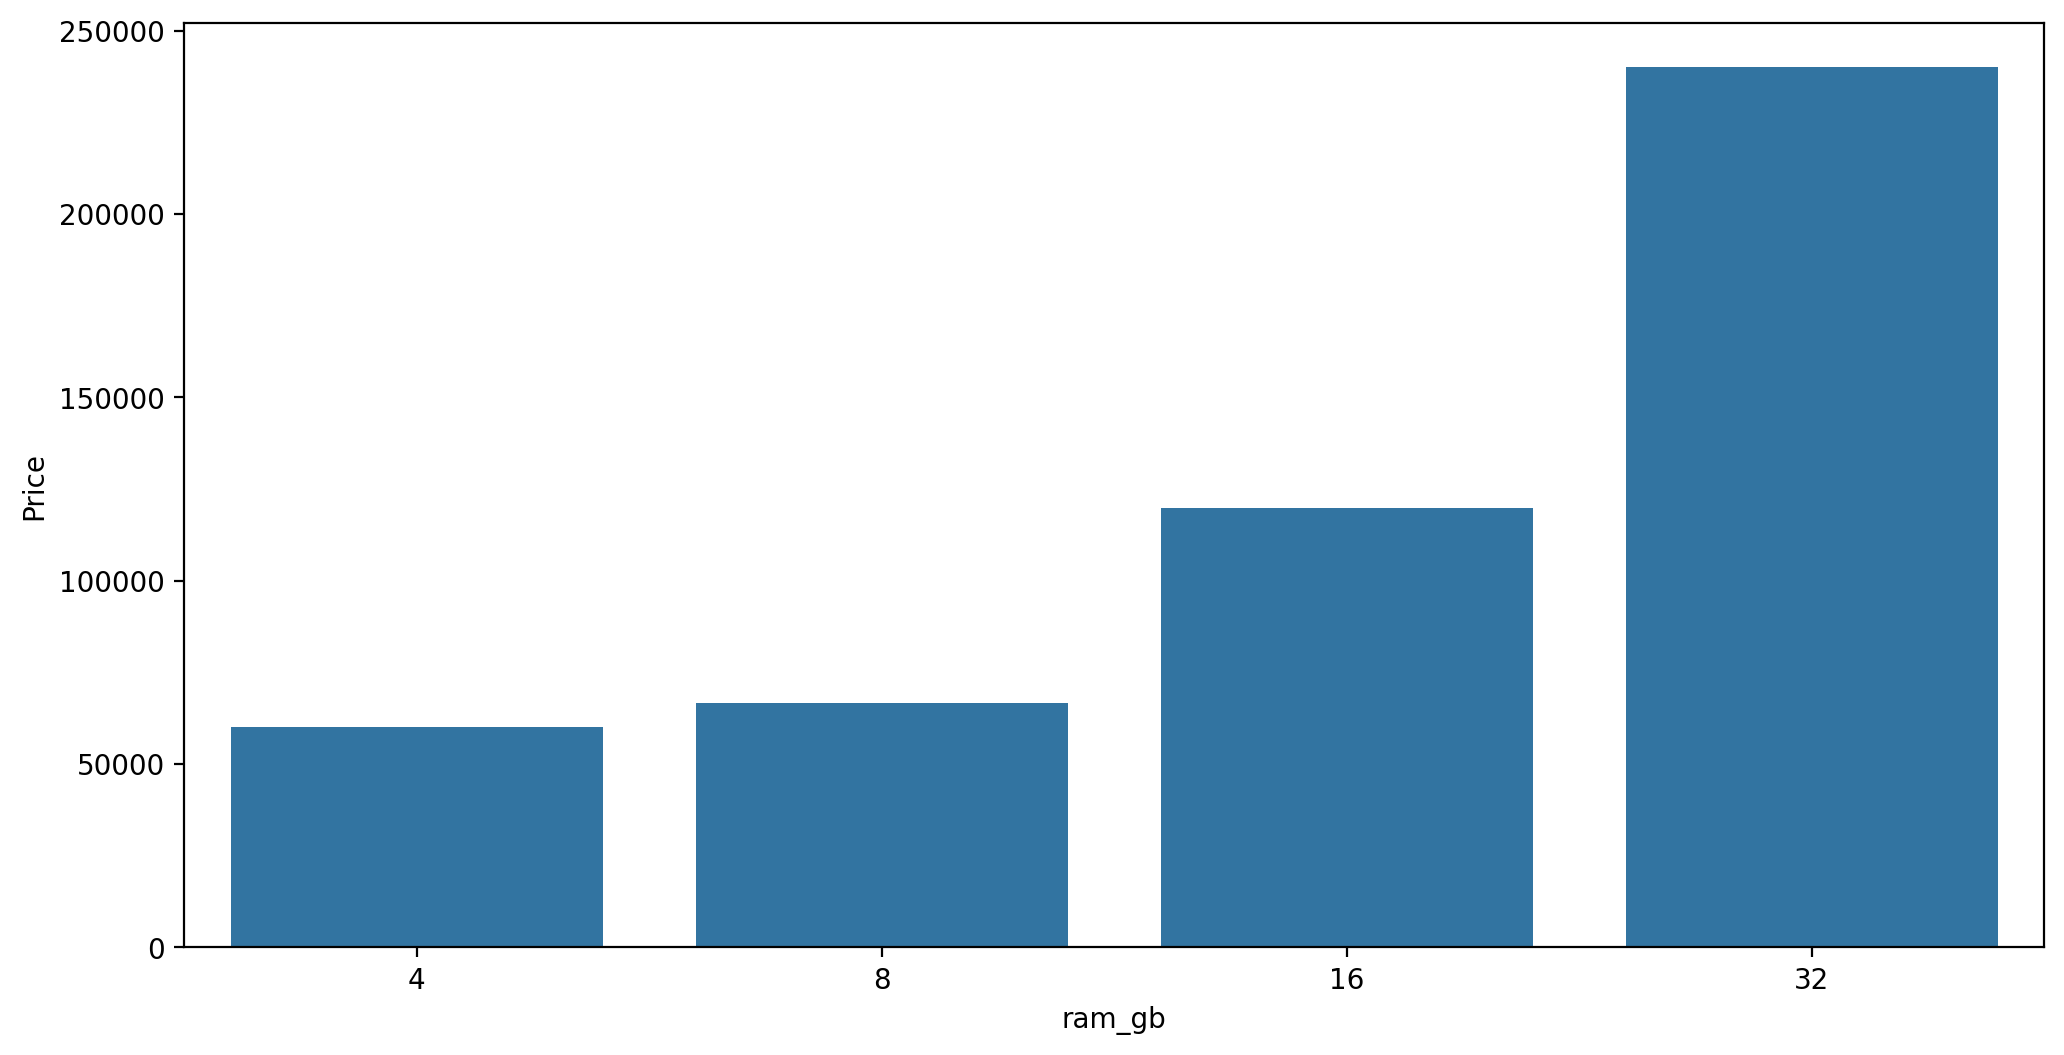

In [79]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ram_gb', y = 'Price', data = df, ci = None)

<Axes: xlabel='ram_type', ylabel='Price'>

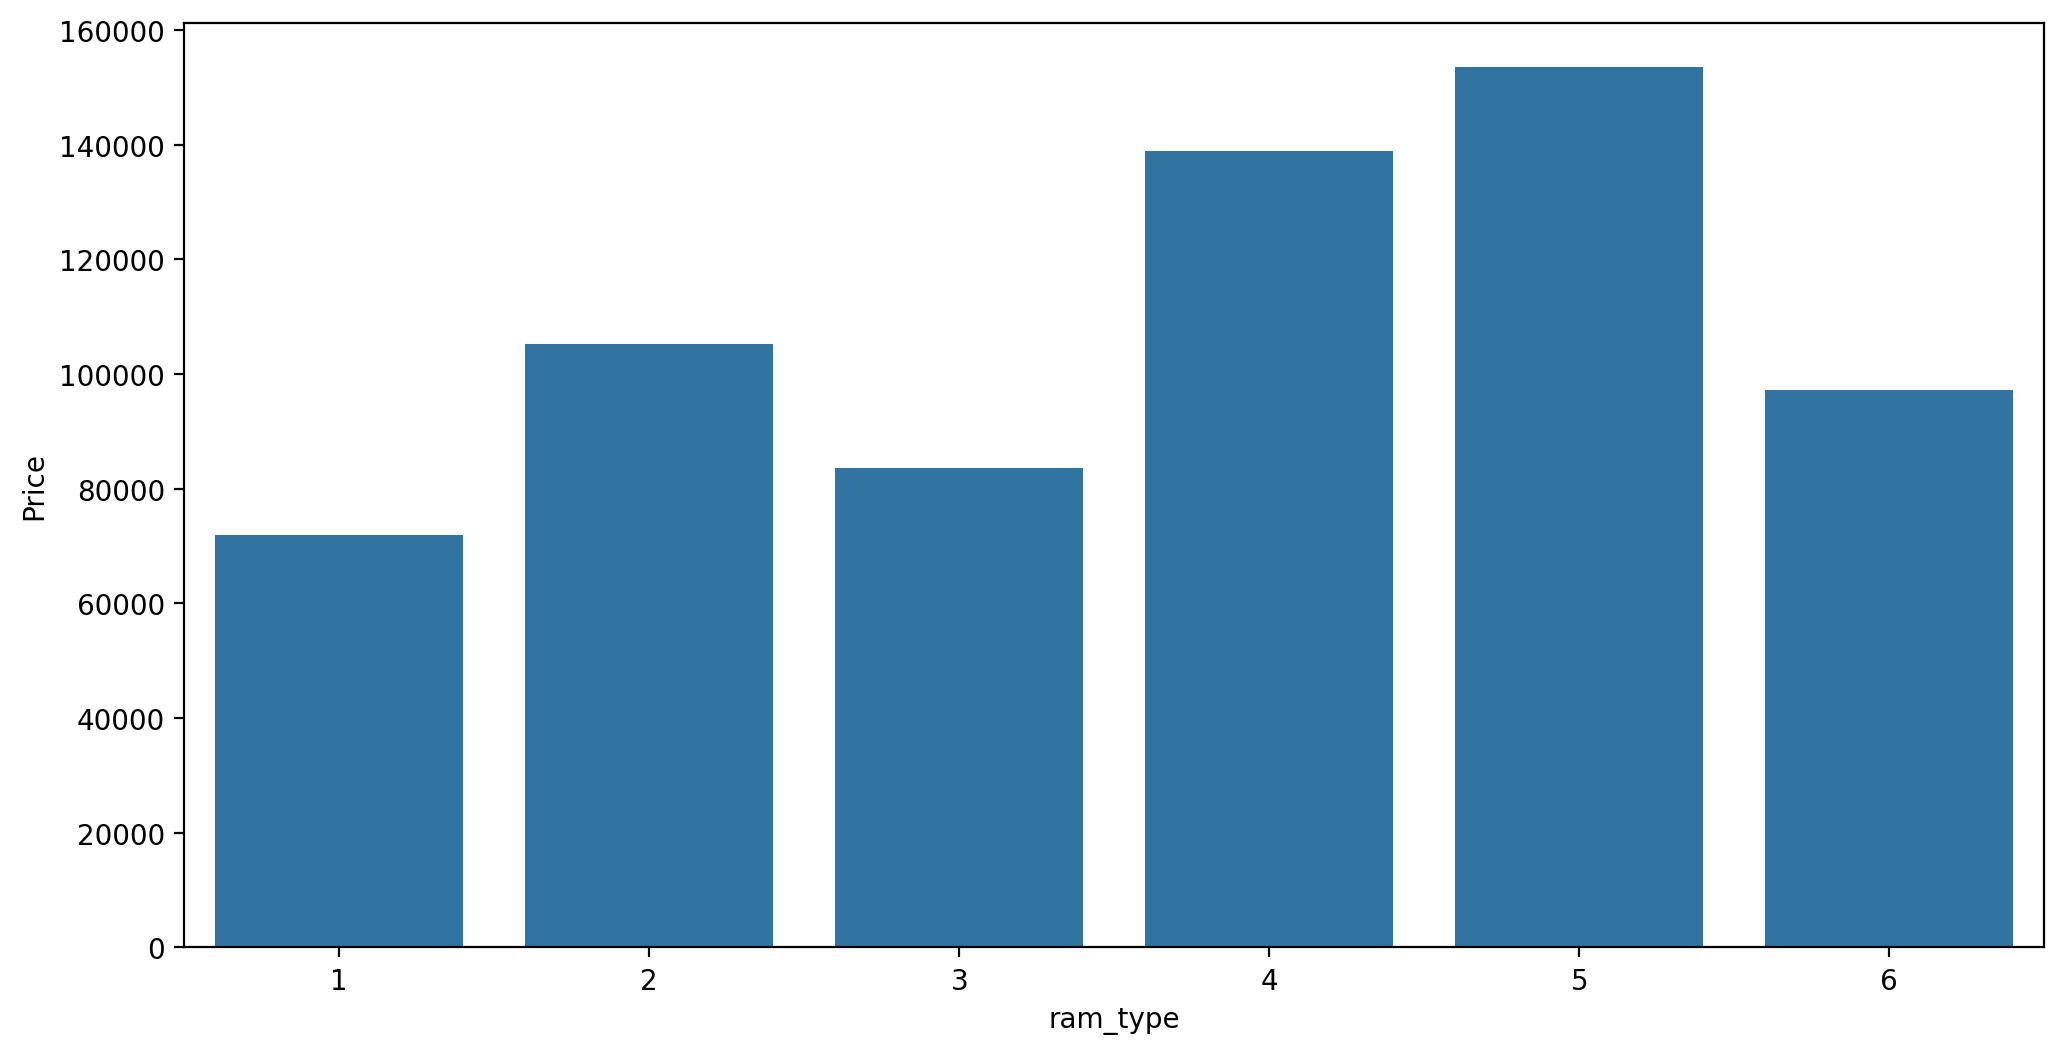

In [81]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ram_type', y = 'Price', data = df, ci = None)

    "DDR4": 1,
    "LPDDR4X": 2,
    "LPDDR4": 3,
    "LPDDR3": 4,
    "DDR5": 5,
    "DDR3": 6

<Axes: xlabel='graphic_card_gb', ylabel='Price'>

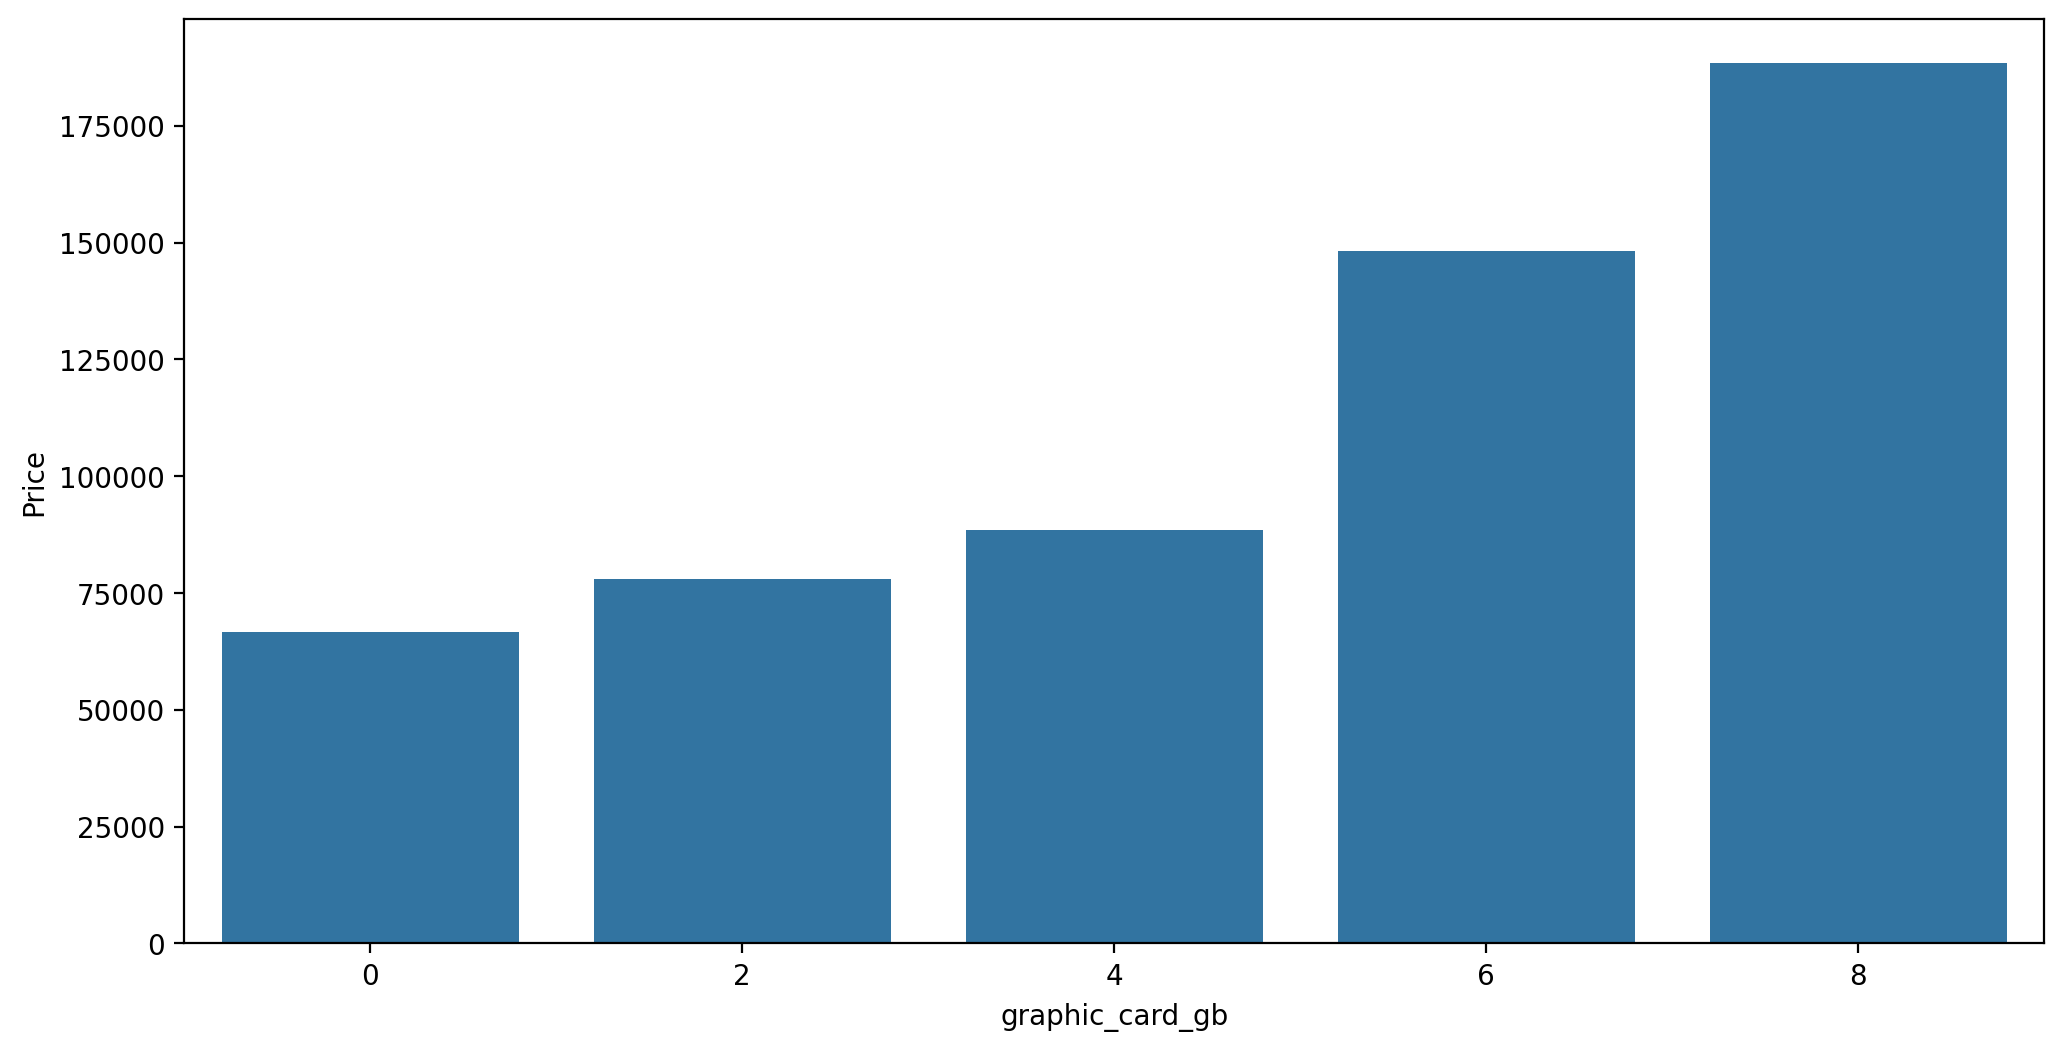

In [96]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'graphic_card_gb', y = 'Price', data = df, ci = None)

<Axes: xlabel='ssd', ylabel='Price'>

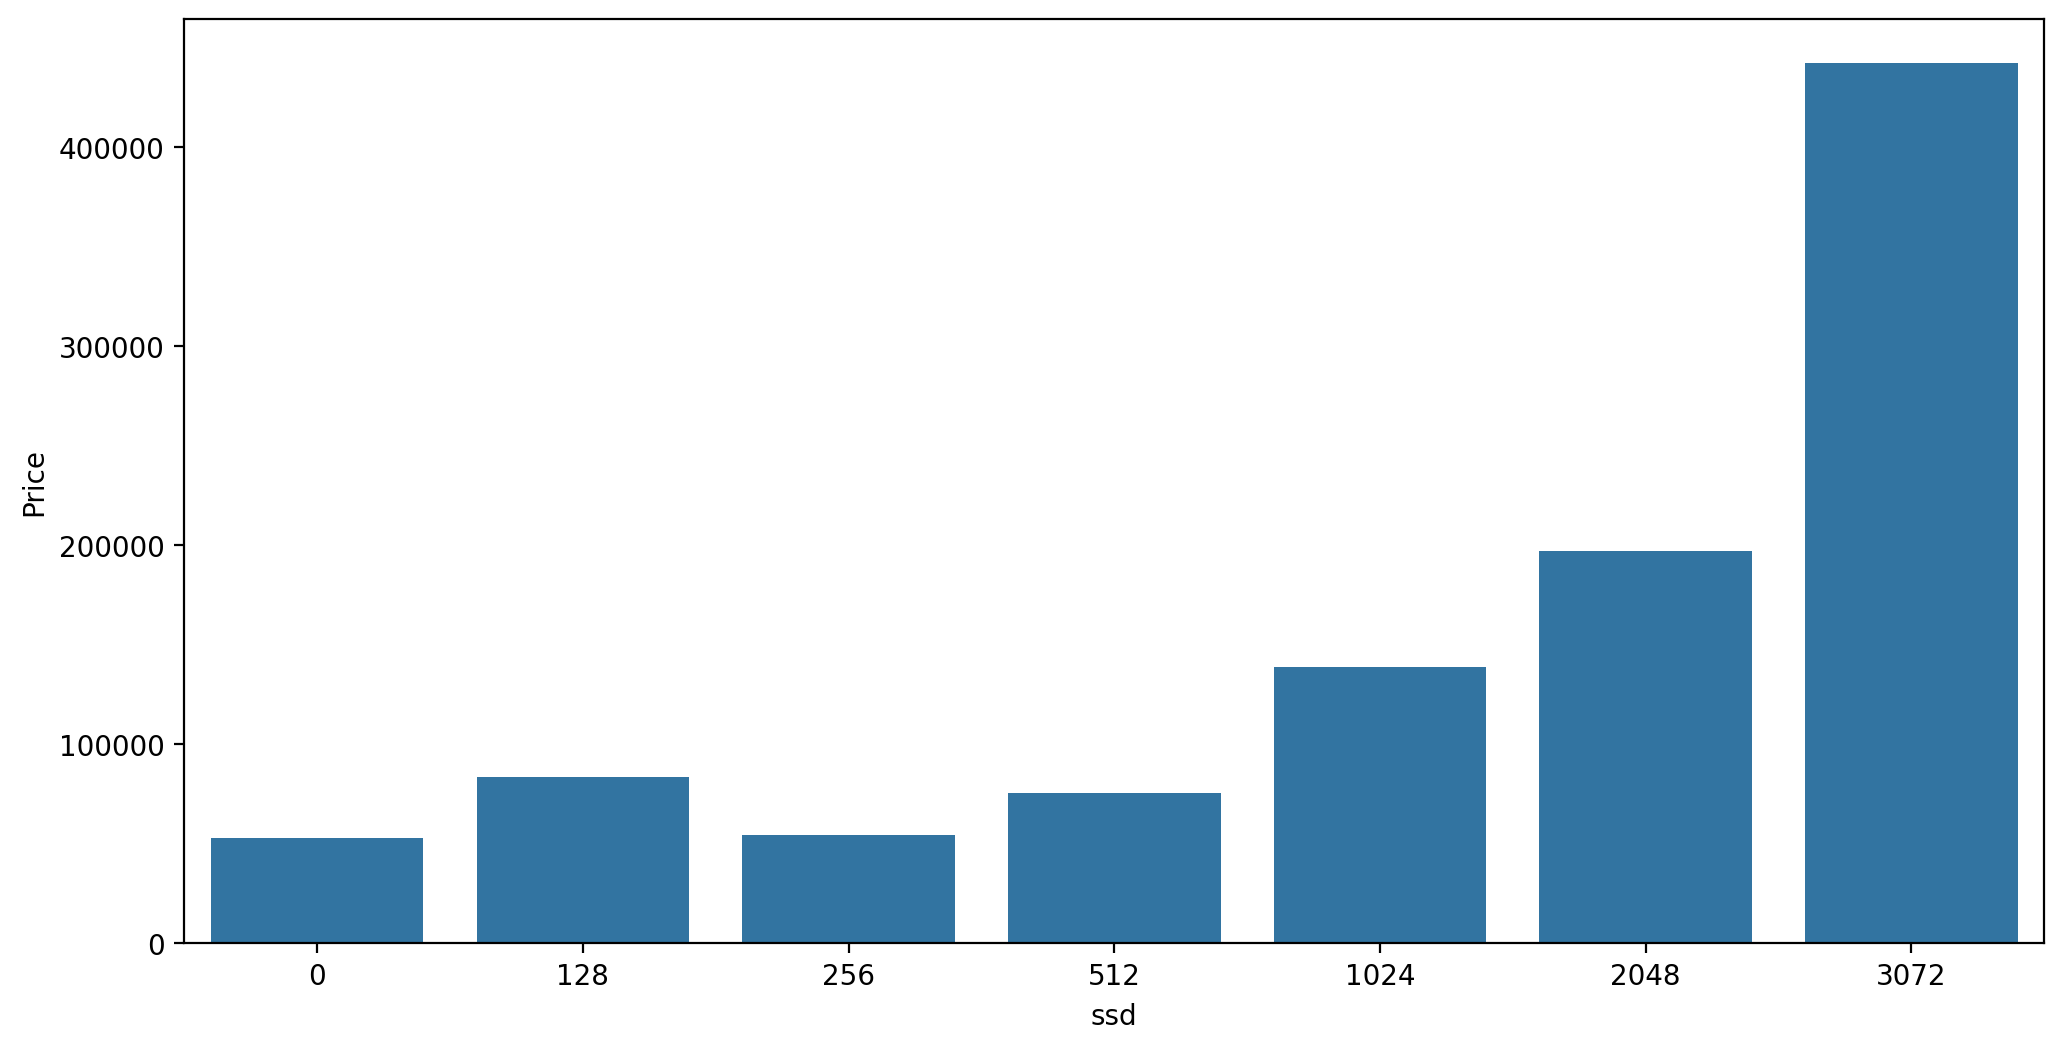

In [188]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'ssd', y = 'Price', data = df, ci = None)

### Обучение модели

In [431]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [447]:
X = df[['ram_gb', 'ram_type', 'graphic_card_gb',
       'Touchscreen', 'ssd','processor_name', 'brand', 'hdd', 'rating', 'Number of Reviews']]

In [449]:
y = df['Price']

In [451]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [456]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [458]:
# Точка пересечения регрессии
lrm.intercept_

-15022.243825179277

In [459]:
# Наклон линии
lrm.coef_

array([ 2507.14417861, 11391.25858812,  4713.17580265, 17107.52395742,
          75.34606424,  2199.53919564,  4468.38834191,    18.68239469,
       -2760.27204114,   -18.83501728])

In [462]:
predictions = lrm.predict(X_test)

In [464]:
predictions

array([ 83189.6102004 ,  52558.90126937,  31714.7735013 ,  40329.45405125,
        71753.59278625,  67247.53440977, 139708.68654542,  50795.54978488,
        70106.59458466,  65054.95167881, 113989.01105831,  73447.61792604,
       108060.08055778,  64053.82818918,  54271.07343295,  31927.98880995,
        37990.69253067,  34101.87205155,  67198.90744982,  78363.77438072,
        85197.85035688,  81066.93428783,  81575.95130877,  75732.40620667,
        82672.73354839,  79187.2711825 ,  38412.44011489,  59529.29910524,
        46732.34426137,  27163.90494997,  80785.01611073,  84728.62815121,
        53232.64421858,  37851.70726938,  60000.03900944, 163079.16458654,
        44843.61956622,  30741.22287465,  96209.82460642,  16885.85578461,
        43854.87452741,  66159.55660822,  51843.58029818, 139670.23977403,
        71264.01786477,  32254.2142223 ,  59529.29910524,  66071.41164031,
        23154.69716319,  98281.70082618, 151335.64858293, 164228.10064092,
        67285.20444434,  

In [466]:
y_test.round(3)

610    104990
174     41890
67      41998
168     40390
275     57500
        ...  
806    134990
770     68500
626     32990
145     41990
578    116941
Name: Price, Length: 247, dtype: int64

<Axes: xlabel='Price'>

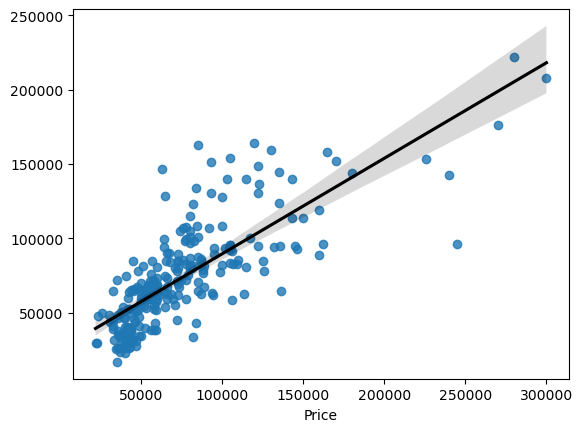

In [468]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

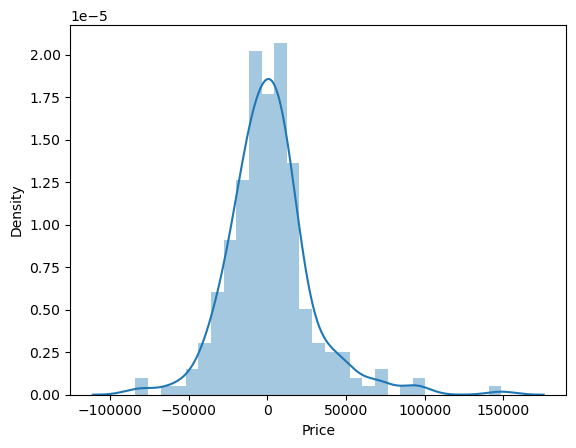

In [469]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии

In [473]:
from sklearn import metrics

In [475]:
metrics.mean_absolute_error(y_test, predictions)

18711.69424060908

In [477]:
metrics.mean_squared_error(y_test, predictions)

735227461.2786517

In [479]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

27115.07811677207

In [523]:
print(f'Test R2 {r2_score(y_test, predictions):.2f}')

Test R2 0.61


##### Умеренное качество модели

### KNeighborsRegressor

In [485]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [487]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [489]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.75
Test R2 0.52


##### Модель хорошо объясняет тренировочные данные, но тестовые данные хуже, что может указывать на переобyчение

### DecisionTreeRegressor

In [493]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [495]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.94
Test R2 0.66


In [497]:
X.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,8.680437,1.268530,1.190765,0.117861,452.121507,3.061968,2.904010,227.071689,3.562576,37.609964
std,4.372408,0.807247,2.026902,0.322640,316.662592,2.438998,1.821545,413.105282,0.567282,121.728017
min,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,256.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,8.000000,1.000000,0.000000,0.000000,512.000000,2.000000,3.000000,0.000000,4.000000,2.000000
75%,8.000000,1.000000,2.000000,0.000000,512.000000,4.000000,4.000000,0.000000,4.000000,18.000000
max,32.000000,6.000000,8.000000,1.000000,3072.000000,11.000000,8.000000,2048.000000,5.000000,1947.000000


### Нормализация

In [500]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [502]:
mms.transform(X_train)

array([[1.42857143e-01, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 7.50000000e-01, 1.17103236e-01],
       [4.28571429e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.50000000e-01, 4.87930149e-02],
       [4.28571429e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.00000000e-01, 7.50000000e-01, 5.13610683e-04],
       ...,
       [1.42857143e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.50000000e-01, 6.16332820e-03],
       [1.42857143e-01, 4.00000000e-01, 1.00000000e+00, ...,
        2.50000000e-01, 7.50000000e-01, 2.56805342e-03],
       [1.42857143e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00]])

In [504]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
0,0.142857,0.0,0.5,0.0,0.166667,0.0,0.714286,0.00,0.75,0.117103
1,0.428571,0.0,0.0,0.0,0.166667,0.0,0.285714,0.00,0.75,0.048793
2,0.428571,0.0,0.0,0.0,0.083333,0.0,0.000000,0.50,0.75,0.000514
3,0.142857,0.0,0.0,0.0,0.166667,0.0,0.000000,0.00,0.50,0.000000
4,0.142857,0.0,0.0,0.0,0.000000,0.1,0.142857,0.50,0.75,0.020544
...,...,...,...,...,...,...,...,...,...,...
571,0.000000,0.0,0.0,0.0,0.083333,0.1,0.285714,0.00,0.75,0.000514
572,0.142857,0.0,0.0,0.0,0.166667,0.1,0.428571,0.00,0.50,0.000000
573,0.142857,0.0,0.0,1.0,0.166667,0.0,0.285714,0.00,0.75,0.006163
574,0.142857,0.4,1.0,0.0,0.000000,0.0,0.714286,0.25,0.75,0.002568


In [506]:
X_train_norm.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.170139,0.053819,0.157986,0.118056,0.150463,0.205903,0.267857,0.111111,0.639323,0.019453
std,0.159301,0.161146,0.264980,0.322954,0.104588,0.240145,0.257281,0.202759,0.142992,0.063251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.142857,0.000000,0.000000,0.000000,0.166667,0.100000,0.285714,0.000000,0.750000,0.001027
75%,0.142857,0.000000,0.250000,0.000000,0.166667,0.300000,0.428571,0.000000,0.750000,0.010272
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [508]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.160208,0.053441,0.127530,0.117409,0.139507,0.206883,0.281666,0.110324,0.643725,0.018999
std,0.148650,0.162483,0.222995,0.322561,0.099260,0.252936,0.267230,0.199656,0.139289,0.060910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.142857,0.000000,0.000000,0.000000,0.166667,0.100000,0.285714,0.000000,0.750000,0.001027
75%,0.142857,0.000000,0.250000,0.000000,0.166667,0.300000,0.428571,0.000000,0.750000,0.007704
max,0.428571,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,0.500000,1.000000,0.608629


#### Обучение модели на масштабированных данных

In [511]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [513]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.75
Test R2 0.55


In [515]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [517]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.94
Test R2 0.66


In [519]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [521]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.66
Test R2 0.61


### Стандартизация

In [529]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [531]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
0,-0.171408,-0.33427,1.291838,-0.365866,0.155063,-0.858157,1.736688,-0.548473,0.774682,1.545202
1,1.623699,-0.33427,-0.596737,-0.365866,0.155063,-0.858157,0.069468,-0.548473,0.774682,0.464272
2,1.623699,-0.33427,-0.596737,-0.365866,-0.642405,-0.858157,-1.042013,1.919655,0.774682,-0.299694
3,-0.171408,-0.33427,-0.596737,-0.365866,0.155063,-0.858157,-1.042013,-0.548473,-0.975188,-0.307821
4,-0.171408,-0.33427,-0.596737,-0.365866,-1.439874,-0.441379,-0.486273,1.919655,0.774682,0.017271
...,...,...,...,...,...,...,...,...,...,...
571,-1.068961,-0.33427,-0.596737,-0.365866,-0.642405,-0.441379,0.069468,-0.548473,0.774682,-0.299694
572,-0.171408,-0.33427,-0.596737,-0.365866,0.155063,-0.441379,0.625208,-0.548473,-0.975188,-0.307821
573,-0.171408,-0.33427,-0.596737,2.733238,0.155063,-0.858157,0.069468,-0.548473,0.774682,-0.210294
574,-0.171408,2.15011,3.180413,-0.365866,-1.439874,-0.858157,1.736688,0.685591,0.774682,-0.267185


In [533]:
X_train_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,-9.868649e-17,-1.757853e-16,1.233581e-17,-1.233581e-17,-8.480870e-18,6.167906e-17,3.700743e-17,-3.392348e-17,2.528841e-16,6.167906e-18
std,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00
min,-1.068961e+00,-3.342699e-01,-5.967373e-01,-3.658665e-01,-1.439874e+00,-8.581568e-01,-1.042013e+00,-5.484729e-01,-4.474930e+00,-3.078213e-01
25%,-1.068961e+00,-3.342699e-01,-5.967373e-01,-3.658665e-01,-6.424055e-01,-8.581568e-01,-1.042013e+00,-5.484729e-01,-9.751885e-01,-3.078213e-01
50%,-1.714078e-01,-3.342699e-01,-5.967373e-01,-3.658665e-01,1.550634e-01,-4.413791e-01,6.946753e-02,-5.484729e-01,7.746825e-01,-2.915667e-01
75%,-1.714078e-01,-3.342699e-01,3.475503e-01,-3.658665e-01,1.550634e-01,3.921762e-01,6.252077e-01,-5.484729e-01,7.746825e-01,-1.452754e-01
max,5.213913e+00,5.876681e+00,3.180413e+00,2.733238e+00,8.129752e+00,3.309620e+00,2.848169e+00,4.387783e+00,2.524553e+00,1.551602e+01


In [535]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [537]:
X_train_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.0690,-0.3343,-0.5967,-0.3659,-1.4399,-0.8582,-1.0420,-0.5485,-4.4749,-0.3078
25%,-1.0690,-0.3343,-0.5967,-0.3659,-0.6424,-0.8582,-1.0420,-0.5485,-0.9752,-0.3078
50%,-0.1714,-0.3343,-0.5967,-0.3659,0.1551,-0.4414,0.0695,-0.5485,0.7747,-0.2916
75%,-0.1714,-0.3343,0.3476,-0.3659,0.1551,0.3922,0.6252,-0.5485,0.7747,-0.1453
max,5.2139,5.8767,3.1804,2.7332,8.1298,3.3096,2.8482,4.3878,2.5246,15.5160


In [539]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,ram_gb,ram_type,graphic_card_gb,Touchscreen,ssd,processor_name,brand,hdd,rating,Number of Reviews
count,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000,247.0000
mean,-0.0624,-0.0023,-0.1150,-0.0020,-0.1048,0.0041,0.0537,-0.0039,0.0308,-0.0072
std,0.9340,1.0092,0.8423,0.9996,0.9499,1.0542,1.0396,0.9856,0.9750,0.9638
min,-1.0690,-0.3343,-0.5967,-0.3659,-1.4399,-0.8582,-1.0420,-0.5485,-2.7251,-0.3078
25%,-1.0690,-0.3343,-0.5967,-0.3659,-0.6424,-0.8582,-1.0420,-0.5485,-0.9752,-0.3078
50%,-0.1714,-0.3343,-0.5967,-0.3659,0.1551,-0.4414,0.0695,-0.5485,0.7747,-0.2916
75%,-0.1714,-0.3343,0.3476,-0.3659,0.1551,0.3922,0.6252,-0.5485,0.7747,-0.1859
max,1.6237,5.8767,3.1804,2.7332,1.7500,3.3096,2.8482,1.9197,2.5246,9.3230


#### Обучение модели на масштабированных данных

In [542]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [544]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.77
Test R2 0.57


In [546]:
tree_1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [548]:
pred_train = tree_1.predict(X_train_std)
pred_test = tree_1.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.94
Test R2 0.66


In [550]:
lrm.fit(X_train_std, y_train)

LinearRegression()

In [552]:
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.66
Test R2 0.61


### Вывод

Таким образом, в ходе выполнения работы была сделано:
1. **Предобработка данных**


   Данные были очищены от лишних символов, категориальные признаки были преобразованы в числовой формат.
3. **Обучение моделей**
   
    Были обучены три модели: линейная регрессия, метод ближайших соседей и дерево решений
5. **Оценка качества моделей r2score**

    Линейная регрессия - 0.66 на тренировочных данных, 0.61 на тестовых,
   
    knn - 0.77 на тренировочных, 0.57 на тестовых,
   
    дерево решений - 0.94 на тренировочных, 0.66 на тестовых

Итог:
Работа показала, что:

Результаты тестовых данных у всех трёх моделей +- одинаковые, но лучше всего себя показало дерев